In [215]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#Loading the datase
df = pd.read_csv('../data/Crop_recommendation.csv')
df.head(200)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.87974371,82.00274423,6.502985292,202.9355362,rice
1,85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice
2,60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice
3,74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice
4,78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice
...,...,...,...,...,...,...,...,...
195,90,57,24,18.92851916,72.80086137,6.158860284,82.34162918,maize
196,67,35,22,23.30546753,63.24648023,6.385684214,108.7603001,maize
197,60,54,19,18.74826712,62.49878458,6.417820493,70.23401597,maize
198,83,58,23,19.74213321,59.66263104,6.381201909,65.50861389,maize


In [217]:
print("Shape:", df.shape)

#checking null values 
print("\nMissing values:\n", df.isnull().sum())

Shape: (2263, 8)

Missing values:
 N              44
P              32
K              47
temperature    26
humidity       44
ph             38
rainfall       53
label          21
dtype: int64


In [225]:
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    non_numeric = df[~df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    if not non_numeric.empty:
        print(f"\nNon-numeric values in '{col}':")
        print(non_numeric[col].unique())

# Converting numeric columns to float, coercing errors to NaN
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

df_filled = df.copy()
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())



Non-numeric values in 'N':
[  nan -999.]

Non-numeric values in 'P':
[ nan -20.]

Non-numeric values in 'K':
[nan -1.]

Non-numeric values in 'temperature':
[  nan -273.   -1.]

Non-numeric values in 'humidity':
[  nan  -50. -100.   -1.  -90.]

Non-numeric values in 'ph':
[ nan  -1.  -2. -12.]

Non-numeric values in 'rainfall':
[  nan -100.]


In [227]:
# Drop rows where label is missing 
df_cleaned = df.dropna(subset=['label']).copy()

for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())
print(df_clean.dtypes)


Missing values after cleaning:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


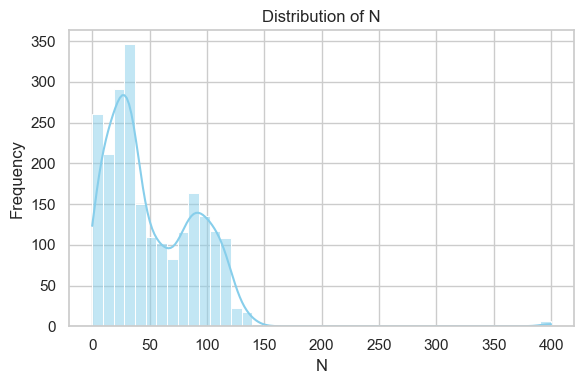

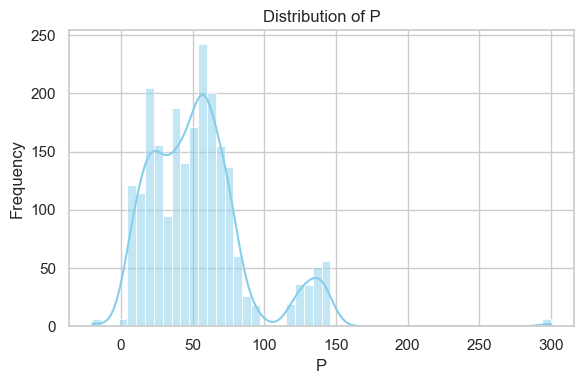

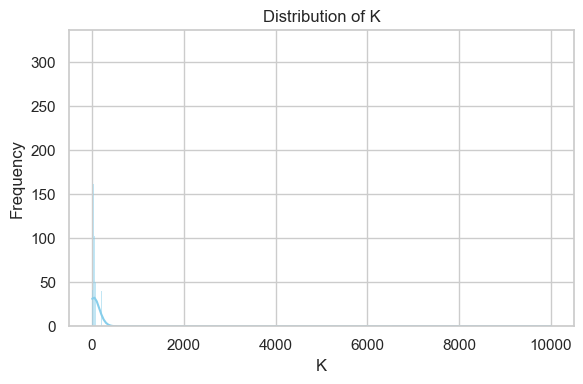

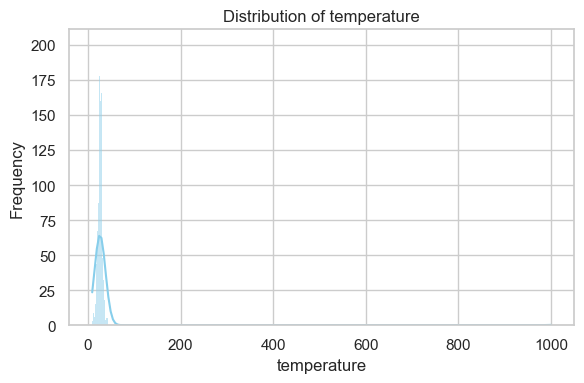

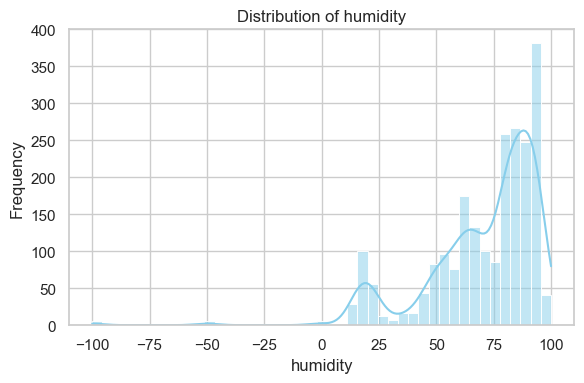

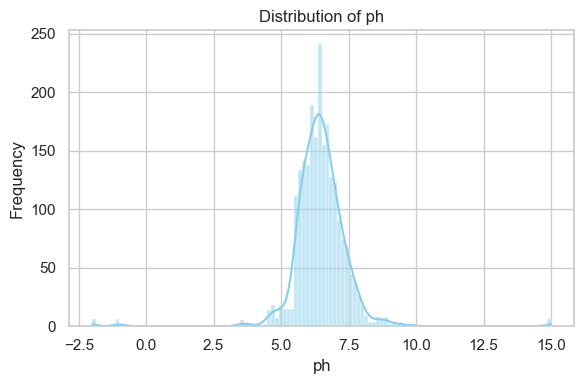

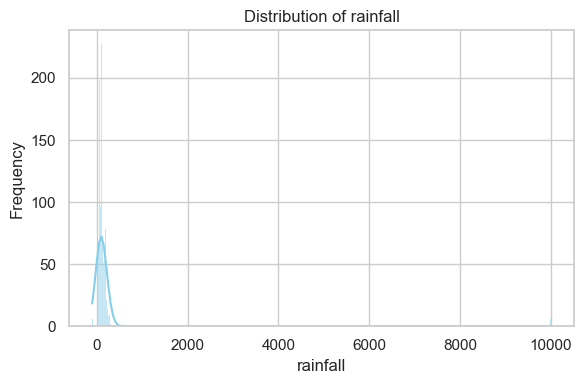

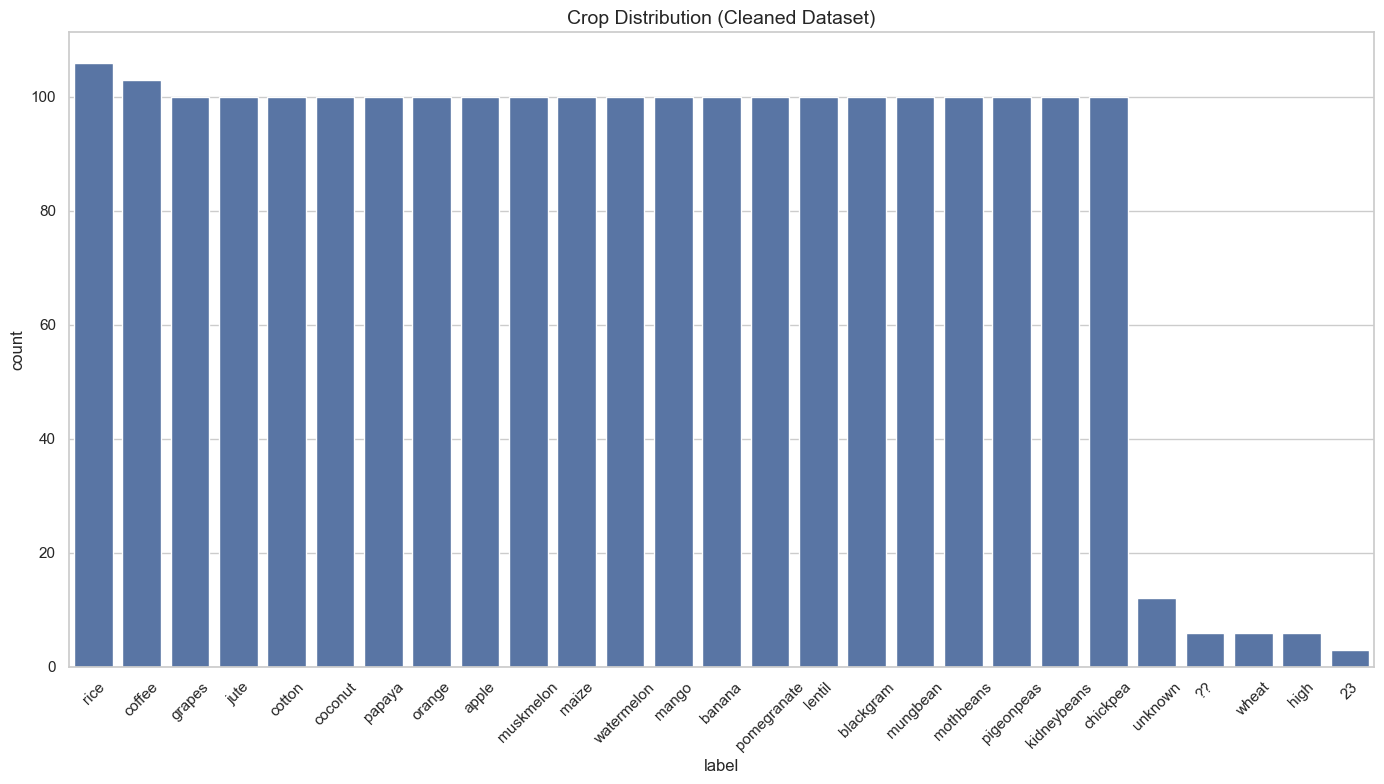

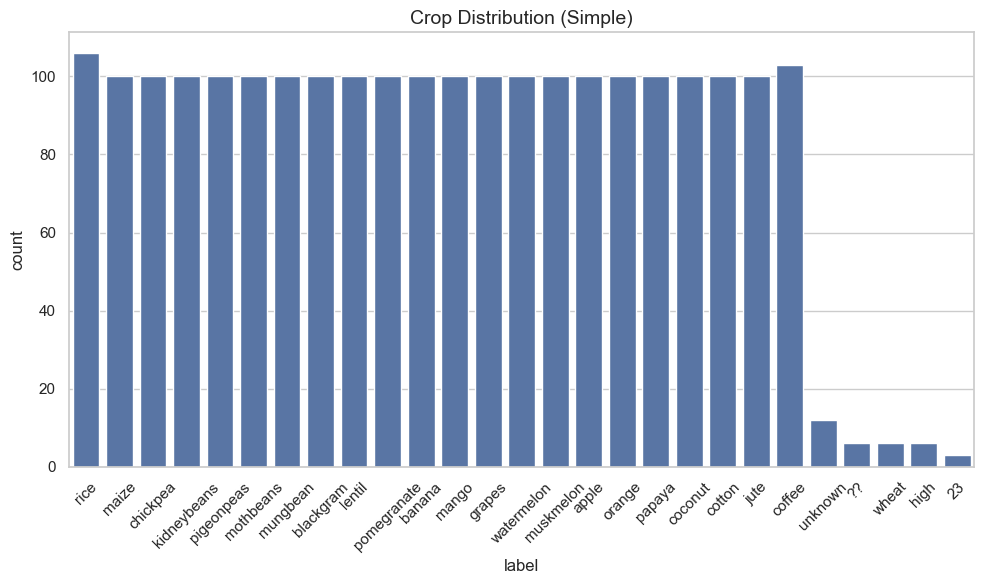

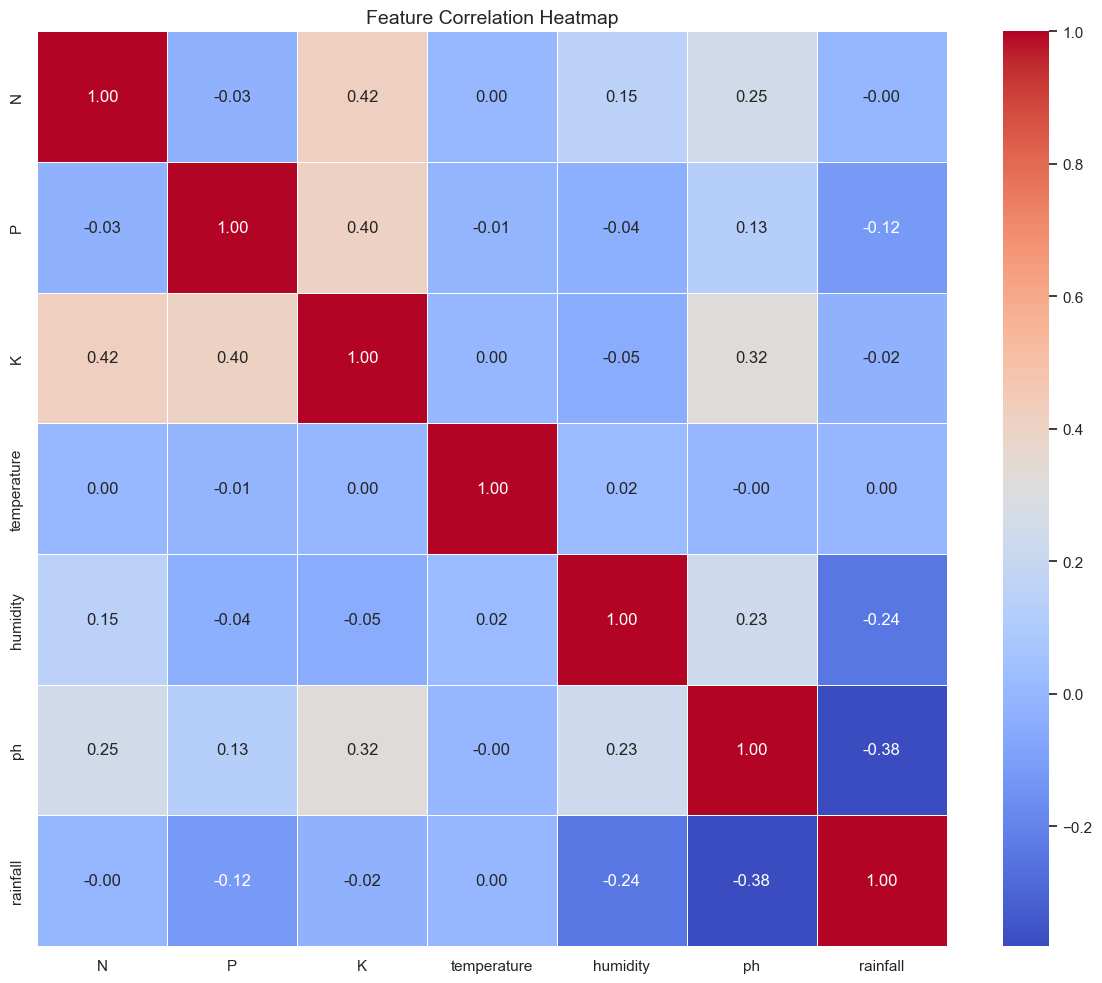

In [229]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

os.makedirs('../outputs', exist_ok=True)

sns.set(style="whitegrid")

#Histograms for all numerical features - (6,4) each
for column in df_cleaned.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'../outputs/hist_{column}.png')
    plt.show()

#Crop distribution (by Cleaned dataset)
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, x='label',
              order=df_cleaned['label'].value_counts().index)
plt.title('Crop Distribution (Cleaned Dataset)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/crop_distribution_cleaned.png')
plt.show()

#Crop distribution 
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_cleaned)
plt.title('Crop Distribution (Simple)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/crop_distribution_simple.png')
plt.show()

#Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.drop('label', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('../outputs/feature_correlation_heatmap.png')
plt.show()


In [231]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separating features and labels
X = df_cleaned.drop('label', axis=1)
y = df_cleaned['label']

# Encoding crop names into numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


🔹 KNN
Accuracy : 0.96
Precision: 0.91
F1-score : 0.92

🔹 LogisticRegression
Accuracy : 0.82
Precision: 0.77
F1-score : 0.75

🔹 DecisionTree
Accuracy : 0.96
Precision: 0.97
F1-score : 0.96



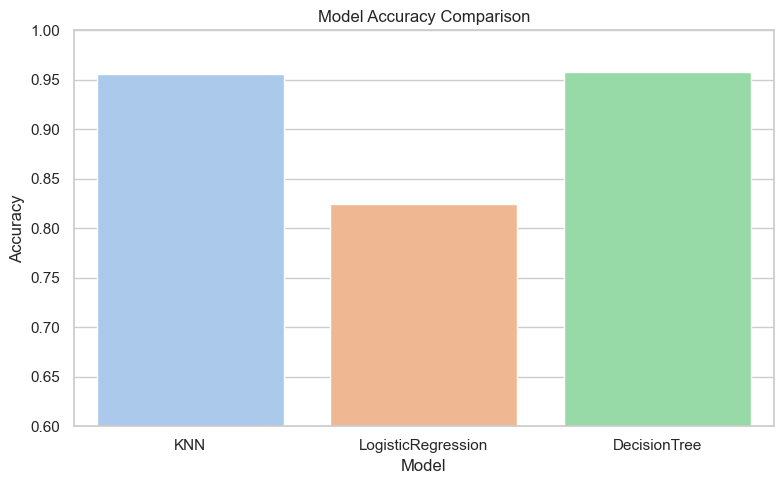

Best model saved: DecisionTree with accuracy 0.96


['../models/label_encoder.pkl']

In [233]:
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

os.makedirs('../models', exist_ok=True)
os.makedirs('../outputs', exist_ok=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=3000), 
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

accuracies = {}
metrics_summary = {}

# Training, predicting, evaluating
for name, model in models.items():
    X_tr = X_train_scaled if name == 'LogisticRegression' else X_train
    X_te = X_test_scaled if name == 'LogisticRegression' else X_test

    model.fit(X_tr, y_train)
    preds = model.predict(X_te)
    
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, target_names=le.classes_, output_dict=True, zero_division=0)
    
    precision = report['macro avg']['precision']
    f1 = report['macro avg']['f1-score']
    
    accuracies[name] = acc
    metrics_summary[name] = {'accuracy': acc, 'precision': precision, 'f1_score': f1}
    
    print(f"🔹 {name}")
    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1-score : {f1:.2f}\n")

df_metrics = pd.DataFrame(metrics_summary).T.reset_index().rename(columns={"index": "Model"})

#Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=df_metrics, x="Model", y="accuracy", hue="Model", palette='pastel', legend=False)
plt.ylim(0.6, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('../outputs/model_accuracy_comparison.png')
plt.show()

acceptable_models = {k: v for k, v in accuracies.items() if 0.85 <= v <= 1.0}
if acceptable_models:
    best_model_name = max(acceptable_models, key=acceptable_models.get)
else:
    best_model_name = max(accuracies, key=accuracies.get)

best_model = models[best_model_name]
joblib.dump(best_model, f'../models/best_model_{best_model_name}.pkl')
print(f"Best model saved: {best_model_name} with accuracy {accuracies[best_model_name]:.2f}")
joblib.dump(le, '../models/label_encoder.pkl')
